# Hierarchical Clustering Asset Allocation with MLFinLab

## Abstract
The following notebook will explore MLFinLab's implementation of Thomas Raffinot's Hierarchical Equal Risk Contribution portfolio optimization technique. Users will be taken through how they can construct an optimal portfolio using MLFinLab's implementation and the different risk metrics and linkage algorithms supported. Additionally, users will be able to see how they can create custom use cases with this library.

## Introduction
This tutorial will show users how to optimize a portfolio using the __[Hierarchical Equal Risk Contribution](https://ssrn.com/abstract=3237540)__ (HERC) optimization technique provided through the MLFinLab library. The HERC technique was developed by Thomas Raffinot in 2018, which built off his original __[Hierarchical Clustering Asset Allocation](https://ssrn.com/abstract=2840729)__ (HCAA) technique from 2017. The official documentation for this tutorial can be found __[here](https://mlfinlab.readthedocs.io/en/latest/portfolio_optimisation/hierarchical_clustering_asset_allocation.html)__. 


From Raffinot's 2018 paper on the HERC optimization technique, the following steps for implementation of the HCAA and HERC techniques were shown. 

Raffinot described the HCAA implementation in four steps:
1. Hierarchical clustering
2. Selecting the optimal number of clusters
3. Capital is allocated across clusters
4. Capital is allocated within clusters

HERC is built off this original implementation, combining the machine learning approach of the HCAA technique with the Top-Down recursive bisection approach from the __[Hierarchical Risk Parity](https://hudsonthames.org/an-introduction-to-the-hierarchical-risk-parity-algorithm/)__ algorithm. The HERC algorithm aims to diversify capital and risk allocations throughout the portfolio.

The steps for the HERC implementation are computed as:
1. Hierarchical clustering
2. Selecting the optimal number of clusters
3. Top-Down recursive bisection
4. Implement Naive Risk Parity within clusters to allocate weights to each asset

The HERC implementation provided through MLFinLab currently supports the following metrics for calculating weight allocations:
1. 'minimum_variance': The variance of the clusters is used as a risk metric
2. 'minimum_standard_deviation': The standard deviation of the clusters is used as a risk metric
3. 'sharpe_ratio': The Sharpe ratio of the clusters is used as a risk metric
4. 'equal_weighting': All clusters are weighted equally with respect to the risk
5. 'expected_shortfall': The expected shortfall of the clusters is used as a risk metric
6. 'conditional_drawdown_risk': The conditional drawdown at risk of the clusters is used as a risk metric

Additionally, MLFinLab allows users to customize the type of linkage algorithm for the use of clustering. The current supported methods are Single Linkage, Average Linkage, and Complete Linkage. The default linkage method in MLFinLab is set as the Average Linkage. To learn more about the different types of linkage methods, please refer Raffinot's original papers or to the official documentation linked above.

In [7]:
# Importing our required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mlfinlab.portfolio_optimization.hcaa import HierarchicalClusteringAssetAllocation

## The Data
All stock data was downloaded from __[Yahoo](https://help.yahoo.com/kb/download-historical-data-yahoo-finance-sln2311.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAALQCM_6ulNppxJ2pt-zmOL_WPxcZvTy4HJXN_3fjA9Dxb9D1-1av3NsYNZJX8-6HqGFmvxOdQLw4ZEjMhAsBRdCycoKX0sVNI7s25XZ0Eb97ambo2F8hKuwEQd9LSe0Vzrj3eHHLUP7sk5LBG44m9F-7VM9C8avDgJCK1nPyIMA7)__. In this tutorial, we will be working with 5-year historical closing-price data from Apple, Amazon, Facebook, Microsoft, Netflix, and Tesla. Note that the data must be in a Pandas dataframe indexed by date.

In [8]:
stock_prices = pd.read_csv('stock_data.csv', parse_dates=True, index_col='Date')
stock_prices.head()

,Apple,Amazon,Facebook,Microsoft,Netflix,Tesla
Date,,,,,,
2015-03-20,125.900002,378.489990,83.800003,42.880001,61.185715,198.080002
2015-03-23,127.209999,375.109985,84.430000,42.860001,60.714287,199.630005
2015-03-24,126.690002,374.089996,85.309998,42.900002,62.611427,201.720001
2015-03-25,123.379997,370.959991,82.919998,41.459999,60.250000,194.300003
2015-03-26,124.239998,367.350006,83.010002,41.209999,59.751427,190.410004


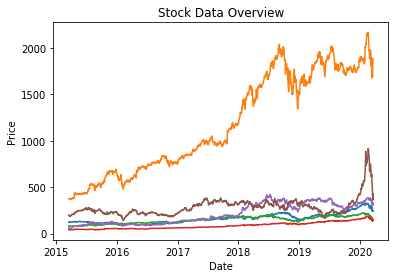

In [9]:
# Taking a quick look at our data

plt.plot(stock_prices)
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Stock Data Overview')
plt.show()

## Minimum Variance Portfolio
The Minimum Variance portfolio uses the variance of the clusters as a risk metric to calculate asset weights. In this example, we will also be showing the different effects of using the three different linkage algorithms. We will first be using the Single Linkage method, then the Complete Linkage method, and finally the Average Linkage method. 

Raffinot provides a clear and concise explanation of the three linkage algorithms in his initial paper on the __[Hierarchical Clustering Based Asset Allocation](https://ssrn.com/abstract=2840729)__ method in 2017. He defines the Single Linkage algorithm as to where the distance between two clusters is the minimum distance between any two points in the clusters. Alternatively, he describes the Complete Linkage algorithm as to where the distance between two clusters is the maximum of the distance between any two points in the clusters. Intuitively, the Average Linkage method describes the distance between two clusters being the average of the distance between any two points in the clusters.

Note that the allocate method for the HierarchicalClusteringAssetAllocation() object requires three parameters to run: 
1. asset_names (a list of strings containing the asset names), 
2. asset_prices (a dataframe of historical asset prices - daily close), and 
3. solution (the type of solution/algorithm to use to calculate the weights). 

Users can also specify: 
1. The type of linkage algorithm (shown below) 
2. The confidence level used for calculating expected shortfall and conditional drawdon at risk 
3. The optimal number of clusters for clustering
4. How to resample the prices

For simplicity, we will only be working with the three required parameters and also specifying our linkage algorithm of choice. For more detailed notes on this implementation, please refer to the __[official documentation](https://mlfinlab.readthedocs.io/en/latest/portfolio_optimisation/hierarchical_clustering_asset_allocation.html)__. 

In [10]:
# HCAA implementation with minimum_variance solution - Single Linkage

hcaaMV_single = HierarchicalClusteringAssetAllocation()
hcaaMV_single.allocate(asset_names=stock_prices.columns,
                       asset_prices=stock_prices,
                       allocation_metric='minimum_variance',
                       linkage='single')

print("Minimum Variance Portfolio Weights - Single Linkage \n", hcaaMV_single.weights)

Minimum Variance Portfolio Weights - Single Linkage 
       Tesla   Netflix  Facebook     Apple    Amazon  Microsoft
0  0.102994  0.105544  0.203379  0.272132  0.139727   0.176224


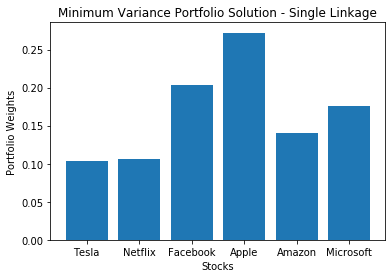

In [12]:
# Plotting our Minimum Variance portfolio - Single Linkage

MV_weights = hcaaMV_single.weights.transpose()
MV_weights = MV_weights.values.tolist()
MV_weights = [item for sublist in MV_weights for item in sublist]
y_pos = np.arange(len(stock_prices.columns))
stocks = ['Tesla', 'Netflix', 'Facebook', 'Apple', 'Amazon', 'Microsoft']

plt.bar(y_pos, MV_weights)
plt.xticks(y_pos, stocks)
plt.xlabel('Stocks')
plt.ylabel('Portfolio Weights')
plt.title('Minimum Variance Portfolio Solution - Single Linkage')
plt.show()

In [13]:
# HCAA implementation with minimum_variance solution - Complete Linkage

hcaaMV_complete = HierarchicalClusteringAssetAllocation()
hcaaMV_complete.allocate(asset_names=stock_prices.columns,
                         asset_prices=stock_prices,
                         allocation_metric='minimum_variance',
                         linkage='complete')

print("Minimum Variance Portfolio Weights - Complete Linkage \n", hcaaMV_complete.weights)

Minimum Variance Portfolio Weights - Complete Linkage 
       Tesla   Netflix     Apple  Facebook    Amazon  Microsoft
0  0.101014  0.106141  0.247522   0.22674  0.140891   0.177692


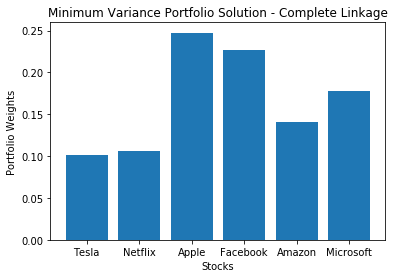

In [14]:
# Plotting our Minimum Variance portfolio - Complete Linkage

MV_weights = hcaaMV_complete.weights.transpose()
MV_weights = MV_weights.values.tolist()
MV_weights = [item for sublist in MV_weights for item in sublist]
y_pos = np.arange(len(stock_prices.columns))
stocks = ['Tesla', 'Netflix', 'Apple', 'Facebook', 'Amazon', 'Microsoft']

plt.bar(y_pos, MV_weights)
plt.xticks(y_pos, stocks)
plt.xlabel('Stocks')
plt.ylabel('Portfolio Weights')
plt.title('Minimum Variance Portfolio Solution - Complete Linkage')
plt.show()

In [15]:
# HCAA implementation with minimum_variance solution - Average Linkage

hcaaMV_average = HierarchicalClusteringAssetAllocation()
hcaaMV_average.allocate(asset_names=stock_prices.columns,
                        asset_prices=stock_prices,
                        allocation_metric='minimum_variance',
                        linkage='average')

print("Minimum Variance Portfolio Weights - Average Linkage \n", hcaaMV_average.weights)

Minimum Variance Portfolio Weights - Average Linkage 
       Tesla   Netflix  Facebook     Apple    Amazon  Microsoft
0  0.102994  0.105544  0.203379  0.272132  0.139727   0.176224


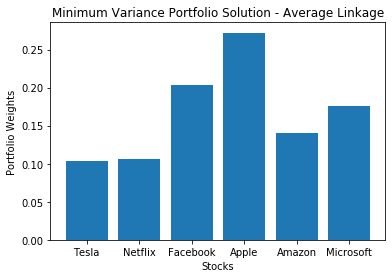

In [16]:
# Plotting our Minimum Variance portfolio - Average Linkage

MV_weights = hcaaMV_average.weights.transpose()
MV_weights = MV_weights.values.tolist()
MV_weights = [item for sublist in MV_weights for item in sublist]
y_pos = np.arange(len(stock_prices.columns))
stocks = ['Tesla', 'Netflix', 'Facebook', 'Apple', 'Amazon', 'Microsoft']

plt.bar(y_pos, MV_weights)
plt.xticks(y_pos, stocks)
plt.xlabel('Stocks')
plt.ylabel('Portfolio Weights')
plt.title('Minimum Variance Portfolio Solution - Average Linkage')
plt.show()

While the differences are not substantial, we can see how the three linkage algorithms affect our asset weights in our portfolio combinations.

## Minimum Standard Deviation Portfolio
The Minimum Standard Deviation portfolio uses the standard deviation of the clusters as a risk metric to solve for the optimal portfolio. 

In [17]:
# HCAA implementation with minimum_standard_deviation solution

hcaaMSD = HierarchicalClusteringAssetAllocation()
hcaaMSD.allocate(asset_names=stock_prices.columns,
                 asset_prices=stock_prices,
                 allocation_metric='minimum_standard_deviation')

print("Minimum Standard Deviation Portfolio Weights \n", hcaaMSD.weights)

Minimum Standard Deviation Portfolio Weights 
       Tesla   Netflix  Facebook    Apple    Amazon  Microsoft
0  0.166775  0.120945  0.167891  0.26204  0.132993   0.149356


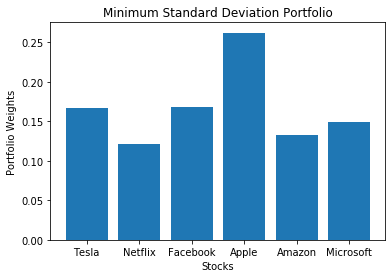

In [18]:
# Plotting our Minimum Standard Deviation portfolio

MSD_weights = hcaaMSD.weights.transpose()
MSD_weights = MSD_weights.values.tolist()
MSD_weights = [item for sublist in MSD_weights for item in sublist]
y_pos = np.arange(len(stock_prices.columns))
stocks = ['Tesla', 'Netflix', 'Facebook', 'Apple', 'Amazon', 'Microsoft']

plt.bar(y_pos, MSD_weights)
plt.xticks(y_pos, stocks)
plt.xlabel('Stocks')
plt.ylabel('Portfolio Weights')
plt.title('Minimum Standard Deviation Portfolio')
plt.show()

## Sharpe Ratio Portfolio
The Sharpe ratio of the clusters is now used as a risk metric when constructing the optimal portfolio.

In [19]:
# HCAA implementation with sharpe_ratio solution

hcaaSR = HierarchicalClusteringAssetAllocation()
hcaaSR.allocate(asset_names=stock_prices.columns,
                asset_prices=stock_prices,
                allocation_metric='sharpe_ratio')

print("Sharpe Ratio Portfolio Weights \n", hcaaSR.weights)

Sharpe Ratio Portfolio Weights 
       Tesla   Netflix  Facebook     Apple    Amazon  Microsoft
0  0.175786  0.177988  0.096835  0.184117  0.197579   0.167694


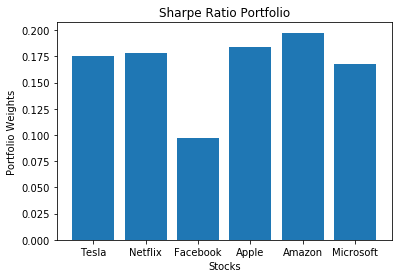

In [20]:
# Plotting our Sharpe ratio portfolio

SR_weights = hcaaSR.weights.transpose()
SR_weights = SR_weights.values.tolist()
SR_weights = [item for sublist in SR_weights for item in sublist]
y_pos = np.arange(len(stock_prices.columns))
stocks = ['Tesla', 'Netflix', 'Facebook', 'Apple', 'Amazon', 'Microsoft']

plt.bar(y_pos, SR_weights)
plt.xticks(y_pos, stocks)
plt.xlabel('Stocks')
plt.ylabel('Portfolio Weights')
plt.title('Sharpe Ratio Portfolio')
plt.show()

## Equal Weighting Portfolio
In this example, all the clusters are weighed equally in terms of risk to construct our optimal portfolio.

In [21]:
# HCAA implementation with equal_weighting solution

hcaaEW = HierarchicalClusteringAssetAllocation()
hcaaEW.allocate(asset_names=stock_prices.columns,
                asset_prices=stock_prices,
                allocation_metric='equal_weighting')

print("Equal Weighting Portfolio Weights \n", hcaaEW.weights)

Equal Weighting Portfolio Weights 
    Tesla  Netflix  Facebook  Apple  Amazon  Microsoft
0   0.25    0.125     0.125   0.25   0.125      0.125


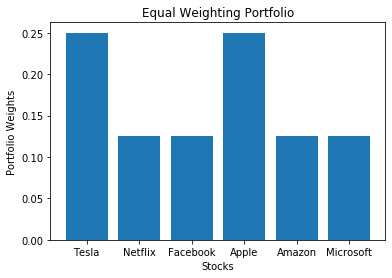

In [22]:
# Plotting our Equal Weighting portfolio

EW_weights = hcaaEW.weights.transpose()
EW_weights = EW_weights.values.tolist()
EW_weights = [item for sublist in EW_weights for item in sublist]
y_pos = np.arange(len(stock_prices.columns))
stocks = ['Tesla', 'Netflix', 'Facebook', 'Apple', 'Amazon', 'Microsoft']

plt.bar(y_pos, EW_weights)
plt.xticks(y_pos, stocks)
plt.xlabel('Stocks')
plt.ylabel('Portfolio Weights')
plt.title('Equal Weighting Portfolio')
plt.show()

## Expected Shortfall Portfolio
The Expected Shortfall (CVaR) of the clusters is now being used as a risk metric to contruct our optimal portfolio.

In [23]:
# HCAA implementation with expected_shortfall solution

hcaaES = HierarchicalClusteringAssetAllocation()
hcaaES.allocate(asset_names=stock_prices.columns,
                asset_prices=stock_prices,
                allocation_metric='expected_shortfall')

print("Expected Shortfall Portfolio Weights \n", hcaaES.weights)

Expected Shortfall Portfolio Weights 
       Tesla   Netflix  Facebook     Apple    Amazon  Microsoft
0  0.171673  0.123084  0.157239  0.261124  0.135141   0.151739


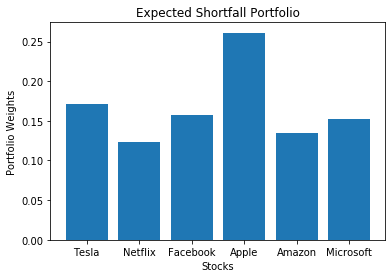

In [24]:
# Plotting our Expected Shortfall portfolio

ES_weights = hcaaES.weights.transpose()
ES_weights = ES_weights.values.tolist()
ES_weights = [item for sublist in ES_weights for item in sublist]
y_pos = np.arange(len(stock_prices.columns))
stocks = ['Tesla', 'Netflix', 'Facebook', 'Apple', 'Amazon', 'Microsoft']

plt.bar(y_pos, ES_weights)
plt.xticks(y_pos, stocks)
plt.xlabel('Stocks')
plt.ylabel('Portfolio Weights')
plt.title('Expected Shortfall Portfolio')
plt.show()

## Conditional Drawdown at Risk Portfolio
The Conditional Drawdown at Risk (CDaR) of the clusters is used as a risk metric.

In [25]:
# HCAA implementation with conditional_drawdown_at_risk solution

hcaaCDR = HierarchicalClusteringAssetAllocation()
hcaaCDR.allocate(asset_names=stock_prices.columns,
                 asset_prices=stock_prices,
                 allocation_metric='conditional_drawdown_risk')

print("Conditional Drawdown at Risk Portfolio Weights \n", hcaaCDR.weights)

Conditional Drawdown at Risk Portfolio Weights 
       Tesla   Netflix  Facebook     Apple    Amazon  Microsoft
0  0.175554  0.123639  0.112365  0.300838  0.128275   0.159328


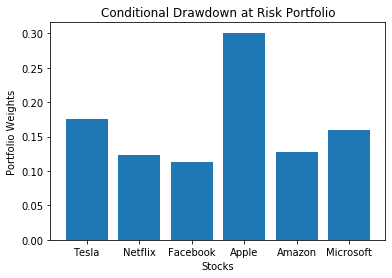

In [26]:
# Plotting our Conditional Drawdown at Risk portfolio

CDR_weights = hcaaCDR.weights.transpose()
CDR_weights = CDR_weights.values.tolist()
CDR_weights = [item for sublist in CDR_weights for item in sublist]
y_pos = np.arange(len(stock_prices.columns))
stocks = ['Tesla', 'Netflix', 'Facebook', 'Apple', 'Amazon', 'Microsoft']

plt.bar(y_pos, CDR_weights)
plt.xticks(y_pos, stocks)
plt.xlabel('Stocks')
plt.ylabel('Portfolio Weights')
plt.title('Conditional Drawdown at Risk Portfolio')
plt.show()

## Custom Input from Users
MLFinLab also provides users with a lot of customizability when it comes to creating their optimal portfolios. Instead of providing the raw historical closing prices for their assets, users can input the asset returns, a covariance matrix of asset returns, and expected asset returns to calculate their optimal portfolio. If you would like to learn more about the customizbility within MLFinLab's HCAA implementation, please refer to the __[official documentation](https://mlfinlab.readthedocs.io/en/latest/portfolio_optimisation/hierarchical_clustering_asset_allocation.html)__.

The following parameters in the allocate() method are utilized in order to do so:
1. 'asset_returns': (pd.DataFrame/NumPy matrix) A matrix of asset returns
2. 'covariance_matrix': (pd.DataFrame/NumPy matrix) A covariance matrix of asset returns
3. 'expected_asset_returns: (list) A list of mean asset returns

To make some of the necessary calculations, we will make use of the ReturnsEstimation class provided by MLFinLab.

In [27]:
# Importing ReturnsEstimation class from MLFinLab

from mlfinlab.portfolio_optimization.returns_estimators import ReturnsEstimation

In [28]:
# Calculating our asset returns

returns = ReturnsEstimation.calculate_returns(stock_prices)
returns.head()

,Apple,Amazon,Facebook,Microsoft,Netflix,Tesla
Date,,,,,,
2015-03-23,0.010405,-0.008930,0.007518,-0.000466,-0.007705,0.007825
2015-03-24,-0.004088,-0.002719,0.010423,0.000933,0.031247,0.010469
2015-03-25,-0.026127,-0.008367,-0.028015,-0.033567,-0.037716,-0.036784
2015-03-26,0.006970,-0.009731,0.001085,-0.006030,-0.008275,-0.020021
2015-03-27,-0.007968,0.008738,0.003494,-0.005824,-0.008344,-0.028412


In [30]:
# Calculating our covariance matrix

cov = returns.cov()
cov

,Apple,Amazon,Facebook,Microsoft,Netflix,Tesla
Apple,0.000301,0.000177,0.000178,0.000195,0.000196,0.000194
Amazon,0.000177,0.000351,0.000217,0.000211,0.000257,0.000200
Facebook,0.000178,0.000217,0.000365,0.000188,0.000227,0.000202
Microsoft,0.000195,0.000211,0.000188,0.000278,0.000220,0.000199
Netflix,0.000196,0.000257,0.000227,0.000220,0.000703,0.000273
Tesla,0.000194,0.000200,0.000202,0.000199,0.000273,0.001026


In [31]:
# Calculating our mean asset returns

mean_returns = ReturnsEstimation.calculate_mean_historical_returns(stock_prices)
mean_returns

Apple        0.171342
Amazon       0.365231
Facebook     0.167243
Microsoft    0.276027
Netflix      0.426720
Tesla        0.283472
dtype: float64

In [32]:
# From here, we can now create our portfolio

hcaa_custom = HierarchicalClusteringAssetAllocation()
hcaa_custom.allocate(asset_names=stock_prices.columns,
                     asset_returns=returns,
                     covariance_matrix=cov, 
                     expected_asset_returns=mean_returns,
                     allocation_metric='conditional_drawdown_risk')

print("Custom HCAA Portfolio - Conditional Drawdown at Risk \n", hcaa_custom.weights)

Custom HCAA Portfolio - Conditional Drawdown at Risk 
       Tesla   Netflix  Facebook     Apple    Amazon  Microsoft
0  0.175554  0.123639  0.112365  0.300838  0.128275   0.159328


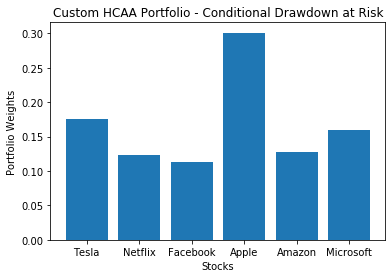

In [33]:
# Plotting our custom portfolio

custom_weights = hcaa_custom.weights.transpose()
custom_weights = custom_weights.values.tolist()
custom_weights = [item for sublist in custom_weights for item in sublist]
y_pos = np.arange(len(stock_prices.columns))
stocks = ['Tesla', 'Netflix', 'Facebook', 'Apple', 'Amazon', 'Microsoft']

plt.bar(y_pos, custom_weights)
plt.xticks(y_pos, stocks)
plt.xlabel('Stocks')
plt.ylabel('Portfolio Weights')
plt.title('Custom HCAA Portfolio - Conditional Drawdown at Risk')
plt.show()

Through this implementation, we can see alternative ways of which users can construct an optimal portfolio using the HCAA techniques implemented by MLFinLab.

## Conclusion
Throughout this notebook, we saw how we can apply Raffinot's work from his Hierarchical Equal Risk Contribution technique through the MLFinLab library. We worked through how we can specify many different parameters to solve for our optimal portfolio, including chaning our risk metrics and the type of linkage algorithms being used for clustering. Users were also made aware of how they can customize their input to have more control over their calculations. If you would like to learn more about the HERC technique, please refer to Raffinot's original HERC paper linked at the top of this notebook. Additionally, please refer to the official documentation for this tutorial which can be found __[at this link](https://mlfinlab.readthedocs.io/en/latest/portfolio_optimisation/hierarchical_clustering_asset_allocation.html)__ if you have any further questions.